In [601]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import chi2_contingency
import itertools
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN

In [397]:
url='w/Data_Science_Projects/refs/heads/main/Sony%20Research/Data/Data_Science_Challenge.csv'
df=pd.read_csv(url)
df.head(2)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3                2.7   
1                13.7                 3                3.7   

   customer service calls  churn  
0                       1  False  
1                       1  False  

[2 rows x 21 columns]

In [398]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

## initial inspection
### shape,data types, missing values, duplicates, summary statistics, outlier detection, class balance

In [400]:
df.shape

(3333, 21)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [402]:
df.isnull().sum() # no missing values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [403]:
df['area code']=df['area code'].astype('object')

In [404]:
df.duplicated().sum() ## no duplicates

0

In [405]:
##summary statistics : numerical 
df.describe()

account length  number vmail messages  total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.064806               8.099010         179.775098   
std         39.822106              13.688365          54.467389   
min          1.000000               0.000000           0.000000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        243.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [406]:
##summary statistics : catagorical 
df.describe(include='object')

state  area code phone number international plan voice mail plan
count   3333       3333         3333               3333            3333
unique    51          3         3333                  2               2
top       WV        415     382-4657                 no              no
freq     106       1655            1               3010            2411

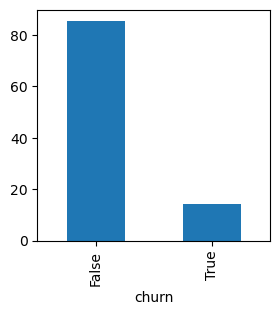

In [407]:
## checking class imbalance
churn_balance=df['churn'].value_counts(normalize=True)*100
plt.figure(figsize=(3,3))
churn_balance.plot(kind='bar')
plt.show()

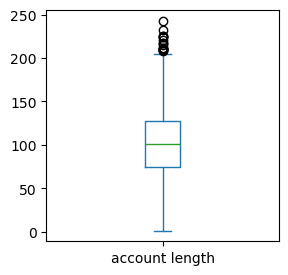

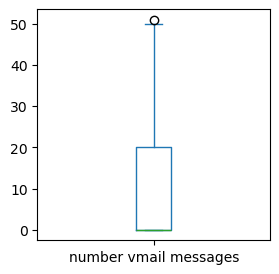

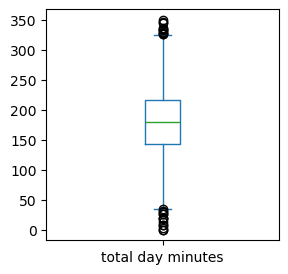

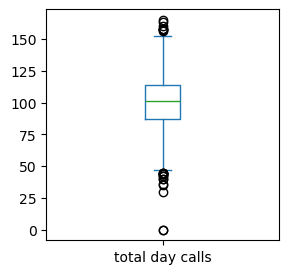

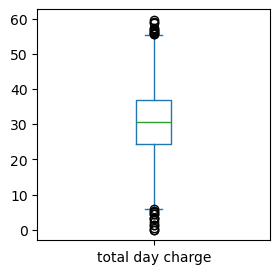

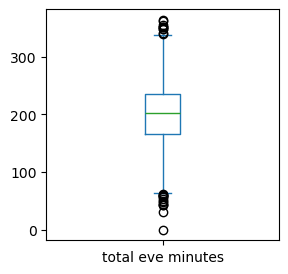

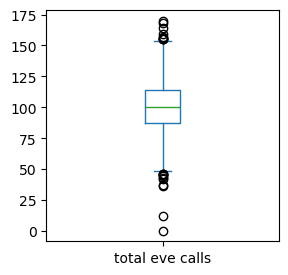

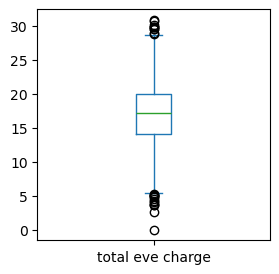

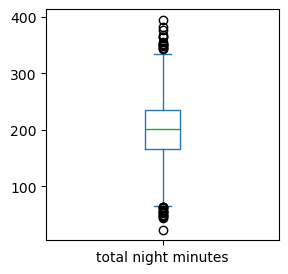

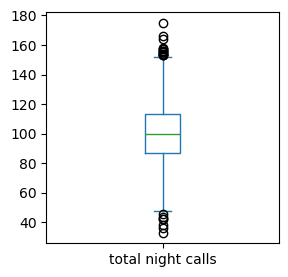

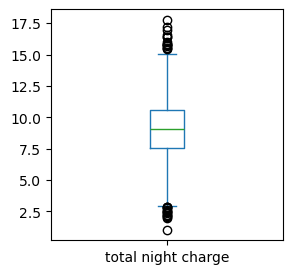

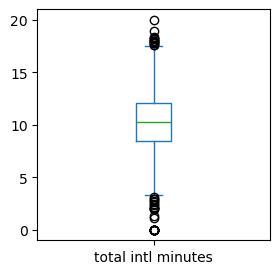

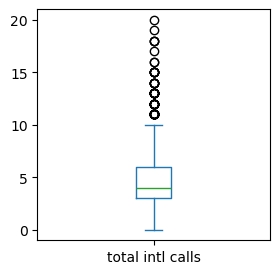

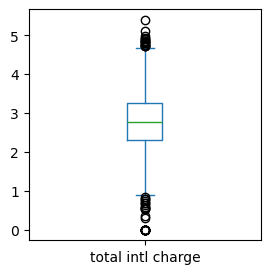

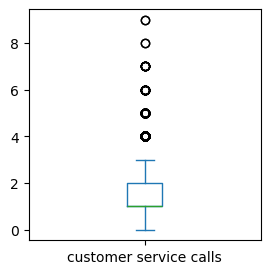

account length            None
number vmail messages     None
total day minutes         None
total day calls           None
total day charge          None
total eve minutes         None
total eve calls           None
total eve charge          None
total night minutes       None
total night calls         None
total night charge        None
total intl minutes        None
total intl calls          None
total intl charge         None
customer service calls    None
dtype: object

In [408]:
## detecting outliers
def plot_box(x):
    plt.figure(figsize=(3,3))
    x.plot(kind='box')
    plt.show()
df.select_dtypes(include='number').apply(plot_box)

In [409]:
def detect_outlier(df):
    outlier_info={}
    for i in df.select_dtypes(include='number'):
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        lc=q1-1.5*iqr
        uc=q3+1.5*iqr
        outlier=df[(df[i]<lc)|(df[i]>uc)]
        outlier_info[i]=outlier.shape[0]
    return outlier_info
        

In [410]:
detect_outlier(df)

{'account length': 18,
 'number vmail messages': 1,
 'total day minutes': 25,
 'total day calls': 23,
 'total day charge': 25,
 'total eve minutes': 24,
 'total eve calls': 20,
 'total eve charge': 24,
 'total night minutes': 30,
 'total night calls': 22,
 'total night charge': 30,
 'total intl minutes': 46,
 'total intl calls': 78,
 'total intl charge': 49,
 'customer service calls': 267}

## conclusion :
- There are 3333 observations, each unique (no duplicates & all phone numbers unique), 20 features and 1 target variable (Churn).- 
None of the columns have any missing data.- 
The data types of all features are correct except "area code" which can be seen when we describe the numerical featurese- .
Most phone numbers belong WVWY) stat- e.
3010 out of 3333 (90%) people don't have international plan and 2411 out of 3333 (72%) don't have voice mail pl- an.
Majority of columns have outliers. We need to handle them so that certain models don't get affected by outli- ers.
We have highly imbalanced dataset: 85.5% customers didn't Churn while only 14.5 - Thus:
This is a classification pr- oblem.
Use model evaluation criteria other than accuracy (since randomly stating no customer will churn will give us 85.5% accuracy). Metri      cs like precision, recall, F1-score, ROC-AUC curve will become imp- ortant.
If identifying churned customers is important, make sure we perform oversampling/undersampling so that our model learns the minori
  ty class as well. Not doing this will lead to our model getting biased towards majoriy class.


## Data preprocessing 
- Handling missing values
- Handling duplicates not required
- Data type correction -> 'area code' number to object already done
- Drop feature -> phone number can be removed as it does not give any usefull information

In [413]:
## why phone number dropped? - we are not able to derive any insights from the length of the phone number (landline or mobile)
df['phone number'].str.len().value_counts()

phone number
8    3333
Name: count, dtype: int64

In [414]:
df.drop(columns='phone number',inplace=True)

In [415]:
df.columns,df.shape

(Index(['state', 'account length', 'area code', 'international plan',
        'voice mail plan', 'number vmail messages', 'total day minutes',
        'total day calls', 'total day charge', 'total eve minutes',
        'total eve calls', 'total eve charge', 'total night minutes',
        'total night calls', 'total night charge', 'total intl minutes',
        'total intl calls', 'total intl charge', 'customer service calls',
        'churn'],
       dtype='object'),
 (3333, 20))

## Exploratory Data Analysis
- Univariate analysis of numerical and catagorical
- Multi-variate analysis between features
- Relationship of features with label(churn)

In [417]:
## Univariate analysis of numerical
def plot_hist(x):
    plt.figure(figsize=(2,2))
    plt.title(x.name)
    x.plot(kind='hist')
    plt.show() 

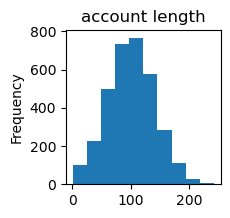

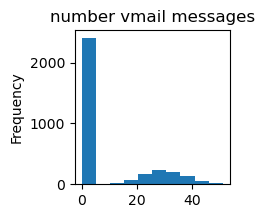

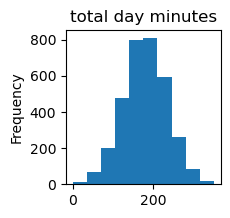

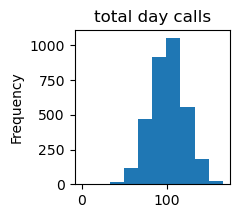

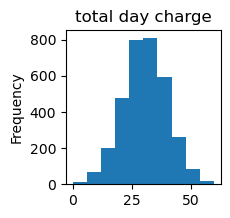

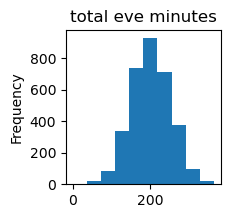

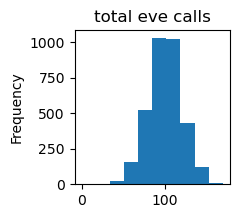

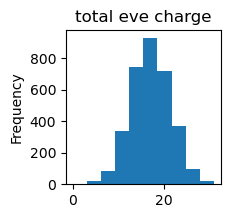

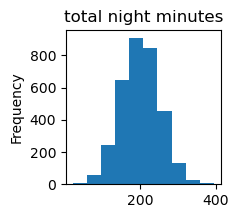

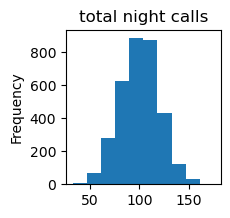

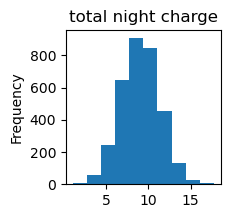

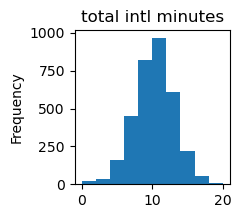

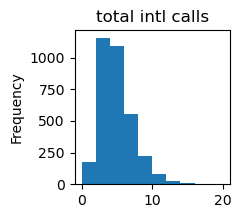

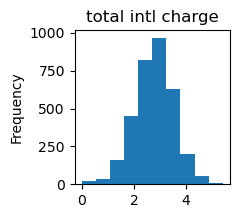

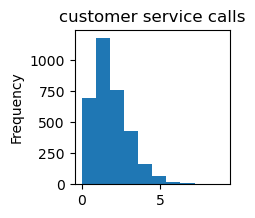

account length            None
number vmail messages     None
total day minutes         None
total day calls           None
total day charge          None
total eve minutes         None
total eve calls           None
total eve charge          None
total night minutes       None
total night calls         None
total night charge        None
total intl minutes        None
total intl calls          None
total intl charge         None
customer service calls    None
dtype: object

In [418]:
num_feat=df.select_dtypes(include='number').columns
df[num_feat].apply(plot_hist)

#### We see that out of 15 numerical features, 3 features are not distributed normally, namely:
- number vmail messages
- total intl calls
- customer service calls
#### Two approches 
- Use tree based algorithm like random forest, XGBoost, etc.
- Apply log tranformation to use most of the algorithm

In [420]:
## Univariate analysis of catagorical
cat_feat=df.select_dtypes(include='object').columns.difference(['state'])
cat_feat

Index(['area code', 'international plan', 'voice mail plan'], dtype='object')

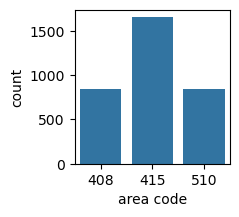

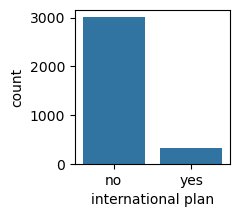

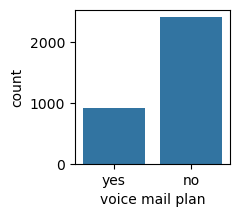

In [421]:
for i in cat_feat:
    plt.figure(figsize=(2,2))
    sns.countplot(x=df[i])
    plt.show()

<Axes: >

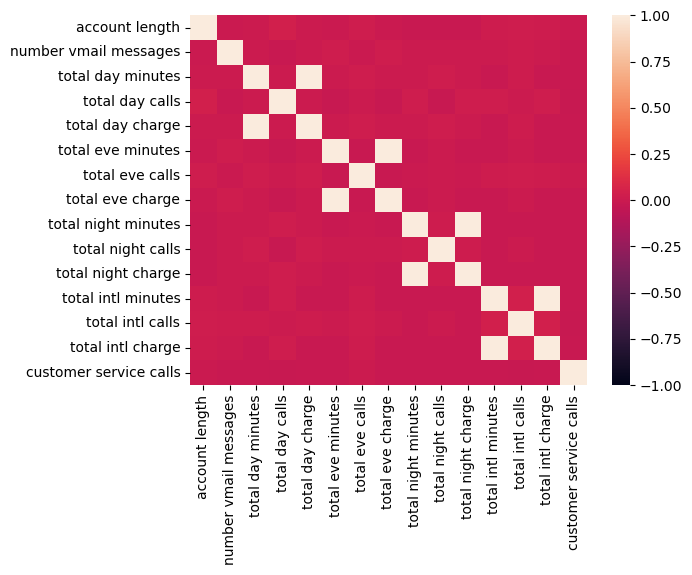

In [422]:
## correlation matrix- for numerical features
sns.heatmap(df[num_feat].corr(),vmin=-1,vmax=1)

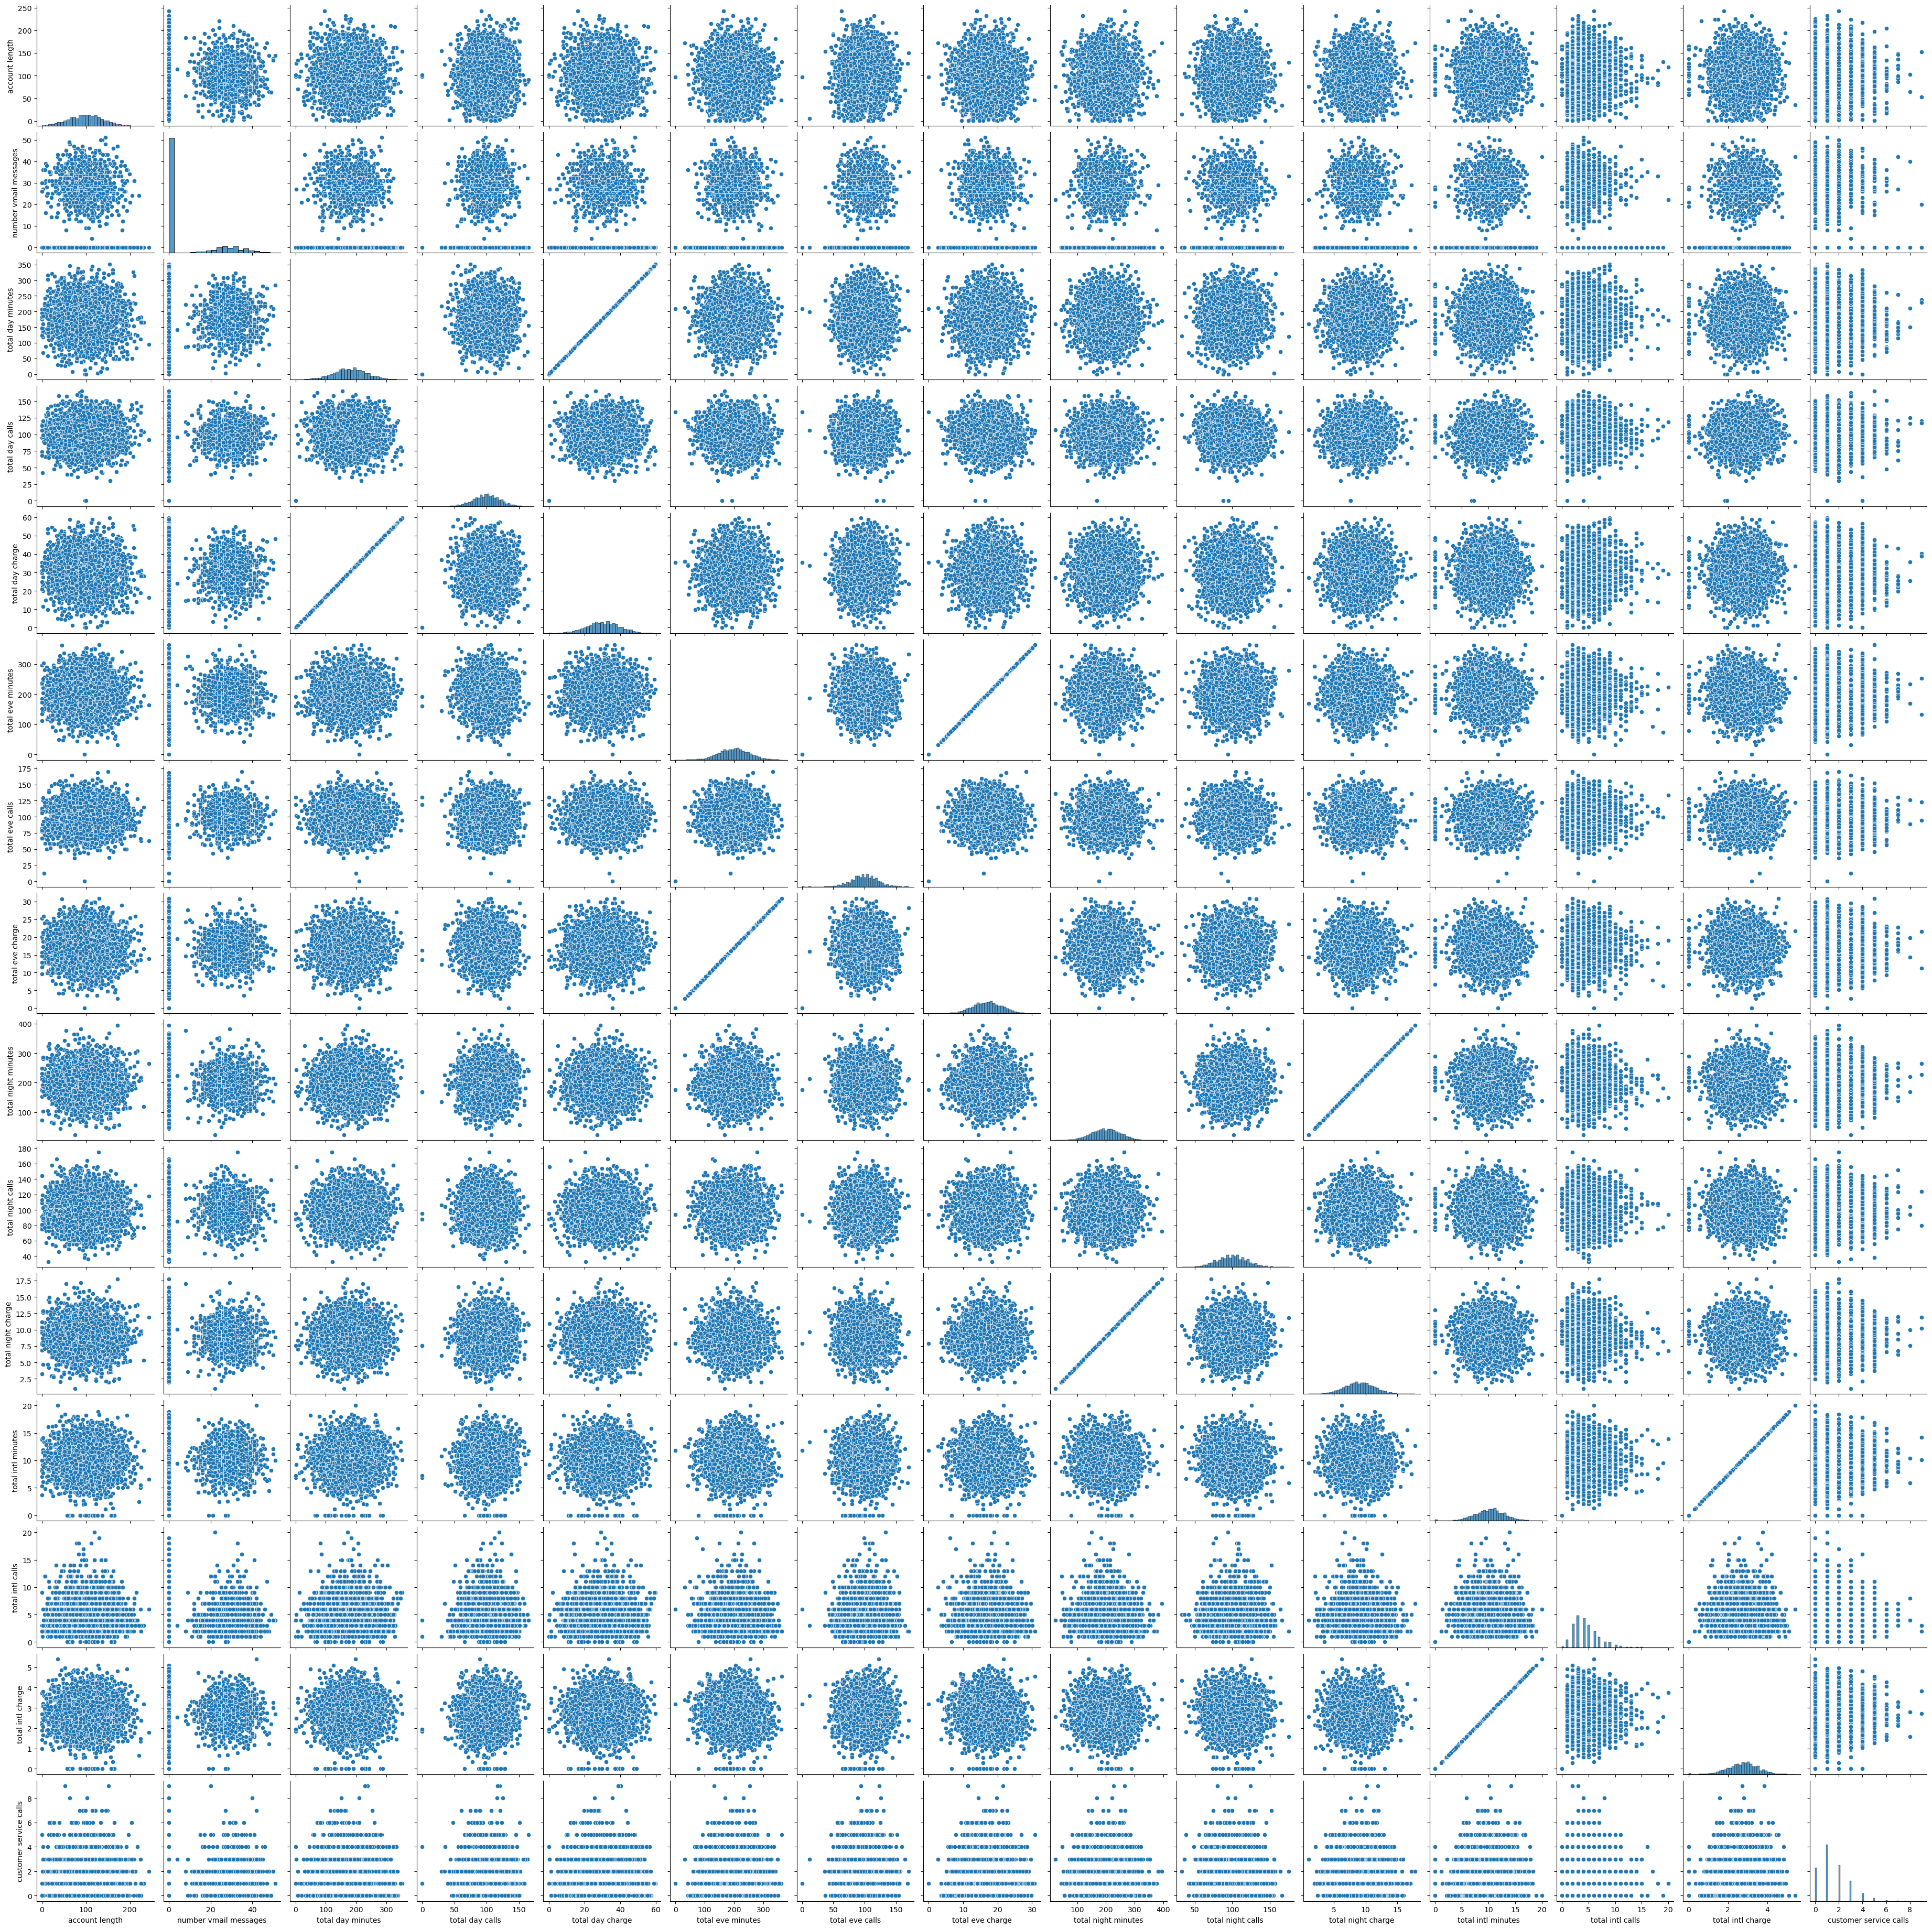

In [423]:
## pairplot :
sns.pairplot(df[num_feat])
plt.show()

In [424]:
## chi squared test - for categorical features
pairs=list(itertools.combinations(cat_feat,2))
for col1,col2 in pairs:
    a,p,c,d=chi2_contingency(pd.crosstab(df[col1],df[col2]))
    print(f'{col1} and {col2} -> p-value:{p}')

area code and international plan -> p-value:0.01890917209609702
area code and voice mail plan -> p-value:0.5045755181199529
international plan and voice mail plan -> p-value:0.7784680822485827


- p-value < 0.05 → significant association between the two categorical variables.
- p-value ≥ 0.05 → no strong evidence of association.
- According to this we have a relationship between area code and international plan

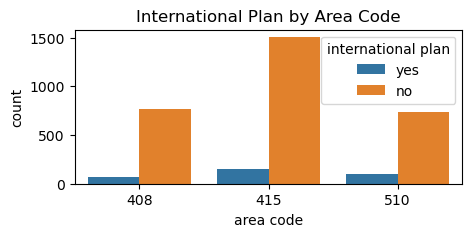

In [426]:
plt.figure(figsize=(5,2))
sns.countplot(x='area code', hue='international plan', data=df)
plt.title('International Plan by Area Code')
plt.show()

We can see that we have few numerical features that are highly correlated:
- 
total day minutes & total day cha)
total eve minutes & total eve ch%)
total night minutes & total ni0%)
total intl minutes & total 00%)

- Relationship of features with label(churn)

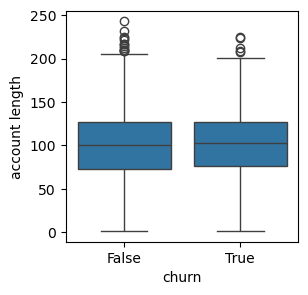

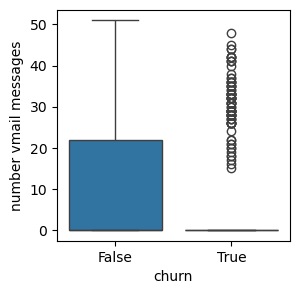

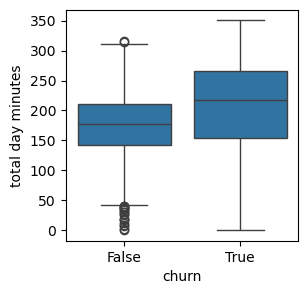

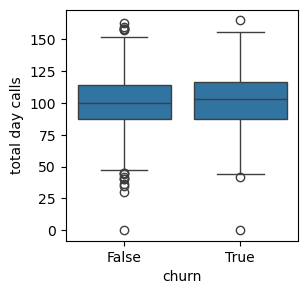

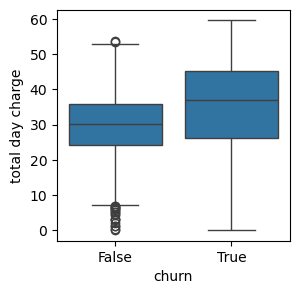

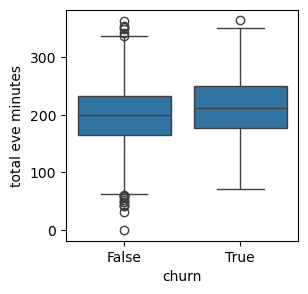

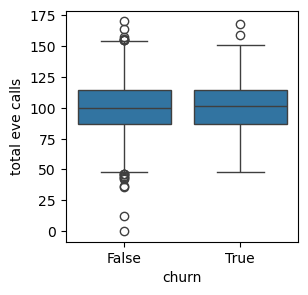

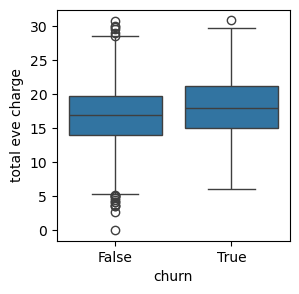

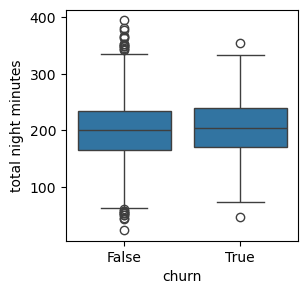

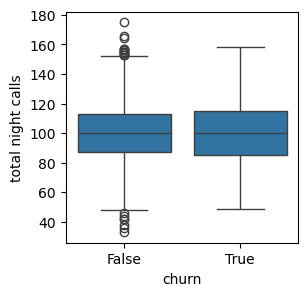

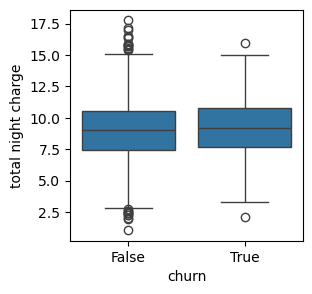

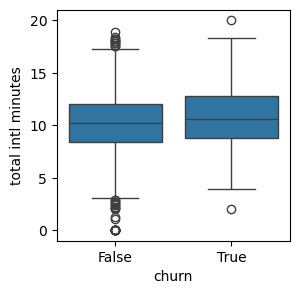

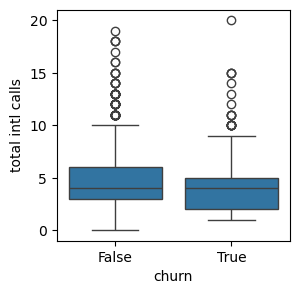

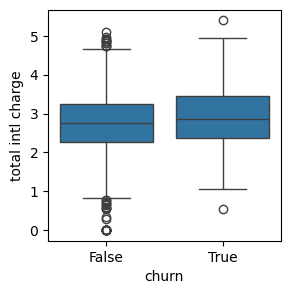

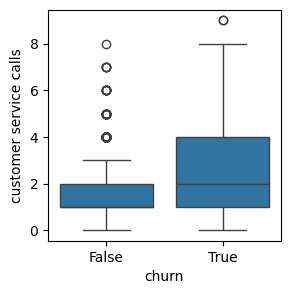

In [429]:
## for numerical vairables - Boxplots
for i in num_feat:
    plt.figure(figsize=(3,3))
    sns.boxplot(data=df,x='churn',y=i)
    plt.show()

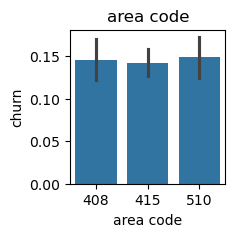

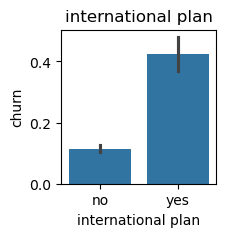

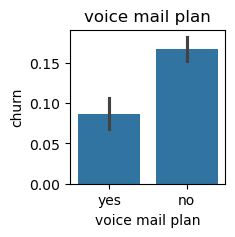

In [430]:
## for cat vairables - countplot
for i in cat_feat:
    plt.figure(figsize=(2,2))
    sns.barplot(y='churn', x=i, data=df)
    plt.title(df[i].name)
    plt.show()

We can see that in numerical features, the following could be good predictors of Churn:
- 
total day minute- s
total day chare- s)
total eve minu- tes
total eve chr- ges)
customer service calls (Churned customers have higher calls)
In categorical features, the following could be good predc- tors:

Having internatiT-  having)
Having voiceOT having)

## Feature engineering :
- transform variables into normal distribution
- train-test split
- encoding
- scaling

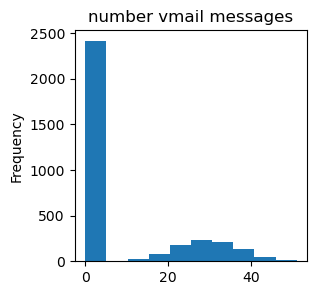

In [433]:
## transforming variables into normal distribution -> number vmail messages,total intl calls,customer service calls
plt.figure(figsize=(3,3))
df['number vmail messages'].plot(kind='hist')
plt.title('number vmail messages')
plt.show()

In [434]:
# bin tranformation -> number vmail message

In [435]:
df['binned_voicemail']=pd.cut(df['number vmail messages'],bins=[0,21,np.inf],labels=['low','high'], right=False)

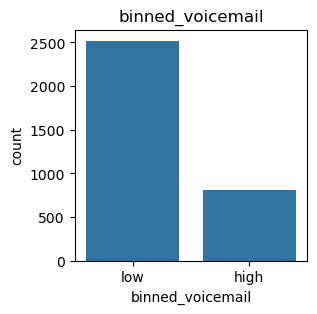

In [436]:
plt.figure(figsize=(3,3))
sns.countplot(x=df['binned_voicemail'])
plt.title('binned_voicemail')
plt.show()

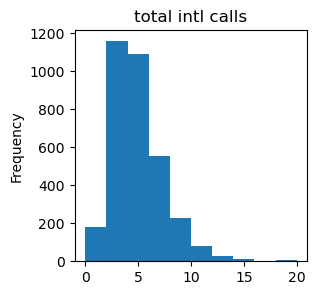

In [437]:
## total intl calls -> log transformation
plt.figure(figsize=(3,3))
df['total intl calls'].plot(kind='hist')
plt.title('total intl calls')
plt.show()

In [438]:
df['total_intl_calls_log']=df['total intl calls'].apply(lambda x:np.log(x+1))

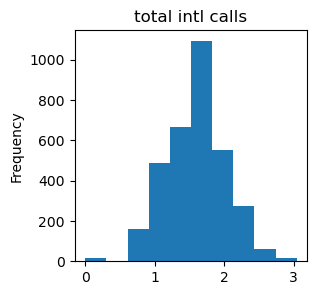

In [439]:
plt.figure(figsize=(3,3))
df['total_intl_calls_log'].plot(kind='hist')
plt.title('total intl calls')
plt.show()

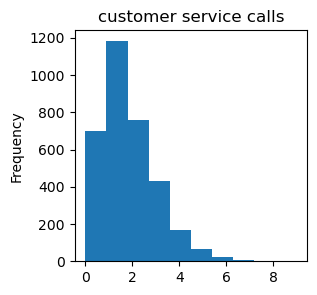

In [440]:
## customer service calls
plt.figure(figsize=(3,3))
df['customer service calls'].plot(kind='hist')
plt.title('customer service calls')
plt.show()

In [441]:
bins = [0, 3, 5, np.inf]
labels = ['Low', 'Medium', 'High']
df['binned_customer_service_calls'] = pd.cut(df['customer service calls'], bins=bins, labels=labels, right=False)

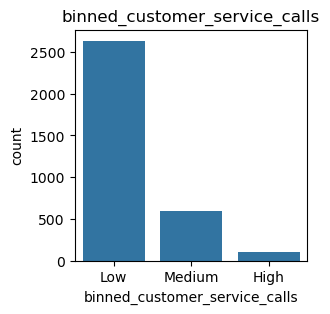

In [442]:
plt.figure(figsize=(3,3))
sns.countplot(x=df['binned_customer_service_calls'])
plt.title('binned_customer_service_calls')
plt.show()

In [443]:
df.drop(columns=['number vmail messages', 'total intl calls','customer service calls'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          3333 non-null   object  
 1   account length                 3333 non-null   int64   
 2   area code                      3333 non-null   object  
 3   international plan             3333 non-null   object  
 4   voice mail plan                3333 non-null   object  
 5   total day minutes              3333 non-null   float64 
 6   total day calls                3333 non-null   int64   
 7   total day charge               3333 non-null   float64 
 8   total eve minutes              3333 non-null   float64 
 9   total eve calls                3333 non-null   int64   
 10  total eve charge               3333 non-null   float64 
 11  total night minutes            3333 non-null   float64 
 12  total night calls              333

In [444]:
## creating features : 
df['total_day_charge_per_minute'] = df['total day charge'] / df['total day minutes']
df['total_eve_charge_per_minute'] = df['total eve charge'] / df['total eve minutes']
df['total_night_charge_per_minute'] = df['total night charge'] / df['total night minutes']
df['total_intl_charge_per_minute'] = df['total intl charge'] / df['total intl minutes']
df.head()

state  account length area code international plan voice mail plan  \
0    KS             128       415                 no             yes   
1    OH             107       415                 no             yes   
2    NJ             137       415                 no              no   
3    OH              84       408                yes              no   
4    OK              75       415                yes              no   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total eve calls  ...  total intl minutes  total intl charge  churn  \
0               99  ...                10.0               2.70  False   
1              103  ...                13.7               3.70  False   
2              110  ...                12.2               3.29  False   
3               88  ...                 6.6               1.78  False   
4              122  ...                10.1               2.73  False   

   binned_voicemail  total_intl_calls_log  binned_customer_service_calls  \
0              high              1.386294                            Low   
1              high              1.386294                            Low   
2               low              1.791759                            Low   
3               low              2.079442                            Low   
4               low              1.386294                         Medium   

   total_day_charge_per_minute total_eve_charge_per_minute  \
0                     0.170011                    0.085005   
1                     0.169988                    0.085013   
2                     0.170008                    0.084983   
3                     0.170007                    0.084976   
4                     0.170006                    0.085030   

   total_night_charge_per_minute total_intl_charge_per_minute  
0                       0.044994                     0.270000  
1                       0.045008                     0.270073  
2                       0.045018                     0.269672  
3                       0.044997                     0.269697  
4                       0.044997                     0.270297  

[5 rows x 24 columns]

## performing train test split

In [446]:
y=df['churn']
X=df.drop(columns='churn')
X.shape,y.shape

((3333, 23), (3333,))

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [448]:
## encoding categorical variables

In [449]:
df.select_dtypes(include=['object','category']).columns

Index(['state', 'area code', 'international plan', 'voice mail plan',
       'binned_voicemail', 'binned_customer_service_calls'],
      dtype='object')

In [450]:
# churn
y_train=y_train.map({True:1,False:0})
y_test=y_test.map({True:1,False:0})

In [451]:
# international plan
X_train['international plan']=X_train['international plan'].map({'yes':1,'no':0})
X_test['international plan']=X_test['international plan'].map({'yes':1,'no':0})

In [452]:
# voice mail plan
X_train['voice mail plan']=X_train['voice mail plan'].map({'yes':1,'no':0})
X_test['voice mail plan']=X_test['voice mail plan'].map({'yes':1,'no':0})

In [453]:
# state -> frequency encoding - no relationship seen between area code and target(chrun). Hence,Here, you can encode each area code based on its frequency in the dataset.
df.groupby('area code').agg(churn_rate=('churn','mean'))

churn_rate
area code            
408          0.145585
415          0.142598
510          0.148810

In [454]:
area_code_freq=X_train['area code'].value_counts(normalize=True)

In [455]:
X_train['area code']=X_train['area code'].map(area_code_freq)
X_test['area code'] = X_test['area code'].map(area_code_freq)
X_train['area code']

3286    0.501125
86      0.253563
1349    0.245311
1649    0.253563
3000    0.245311
          ...   
2670    0.245311
2165    0.501125
2988    0.501125
179     0.253563
2762    0.253563
Name: area code, Length: 2666, dtype: float64

In [456]:
# state -> target encoding - because realtionship can be seen in states and churn (target)
pd.concat([X_train['state'],y_train],axis=1).groupby('state')['churn'].mean().reset_index().sort_values(by='churn',ascending=False)

state     churn
4     CA  0.285714
20    MD  0.267857
31    NJ  0.264151
40    SC  0.260870
22    MI  0.228070
47    WA  0.224490
33    NV  0.218182
25    MS  0.215686
26    MT  0.214286
43    TX  0.210526
38    PA  0.205882
6     CT  0.189655
34    NY  0.187500
16    KS  0.185185
2     AR  0.177778
10    GA  0.175000
23    MN  0.174603
21    ME  0.169811
27    NC  0.169811
15    IN  0.160714
8     DE  0.156863
35    OH  0.152542
36    OK  0.150943
13    ID  0.150000
44    UT  0.135593
24    MO  0.132075
19    MA  0.129630
30    NH  0.127660
9     FL  0.125000
5     CO  0.125000
41    SD  0.125000
37    OR  0.122807
32    NM  0.122449
17    KY  0.122449
28    ND  0.111111
14    IL  0.104167
49    WV  0.101124
18    LA  0.095238
1     AL  0.090909
12    IA  0.090909
46    VT  0.090909
50    WY  0.083333
39    RI  0.083333
48    WI  0.075758
42    TN  0.073171
0     AK  0.073171
3     AZ  0.070175
45    VA  0.068966
7     DC  0.066667
29    NE  0.060000
11    HI  0.023256

In [457]:
target_encoding_state=pd.concat([X_train['state'],y_train],axis=1).groupby('state').agg(churn_rate=('churn','mean'))
target_encoding_state
X_train['state']=X_train['state'].map(target_encoding_state['churn_rate'])
X_test['state']=X_test['state'].map(target_encoding_state['churn_rate'])
X_train['state']

3286    0.152542
86      0.160714
1349    0.122449
1649    0.127660
3000    0.264151
          ...   
2670    0.083333
2165    0.132075
2988    0.068966
179     0.185185
2762    0.066667
Name: state, Length: 2666, dtype: float64

In [458]:
# binned_voicemail -> target encoding 
pd.concat([X_train['binned_voicemail'],y_train],axis=1).groupby('binned_voicemail').agg(churn_rate=('churn','mean'))

C:\Users\Sweta Bisht\AppData\Local\Temp\ipykernel_37172\1074522988.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.concat([X_train['binned_voicemail'],y_train],axis=1).groupby('binned_voicemail').agg(churn_rate=('churn','mean'))


churn_rate
binned_voicemail            
low                 0.163205
high                0.086957

In [459]:
target_encoding_binned_voicemail=pd.concat([X_train['binned_voicemail'],y_train],axis=1).groupby('binned_voicemail').agg(churn_rate=('churn','mean'))
X_train['binned_voicemail']=X_train['binned_voicemail'].map(target_encoding_binned_voicemail['churn_rate']).astype('float')
X_test['binned_voicemail']=X_test['binned_voicemail'].map(target_encoding_binned_voicemail['churn_rate']).astype('float')
X_train['binned_voicemail']

C:\Users\Sweta Bisht\AppData\Local\Temp\ipykernel_37172\3994394742.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_encoding_binned_voicemail=pd.concat([X_train['binned_voicemail'],y_train],axis=1).groupby('binned_voicemail').agg(churn_rate=('churn','mean'))


3286    0.086957
86      0.163205
1349    0.086957
1649    0.163205
3000    0.163205
          ...   
2670    0.163205
2165    0.163205
2988    0.163205
179     0.163205
2762    0.163205
Name: binned_voicemail, Length: 2666, dtype: float64

In [460]:
# binned_customer_service_calls
pd.concat([X_train['binned_customer_service_calls'],y_train],axis=1).groupby('binned_customer_service_calls').agg(churn_rate=('churn','mean'))

C:\Users\Sweta Bisht\AppData\Local\Temp\ipykernel_37172\41919468.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.concat([X_train['binned_customer_service_calls'],y_train],axis=1).groupby('binned_customer_service_calls').agg(churn_rate=('churn','mean'))


churn_rate
binned_customer_service_calls            
Low                              0.110636
Medium                           0.210417
High                             0.650000

In [461]:
target_encoding_binned_csc = pd.concat([X_train['binned_customer_service_calls'], y_train], axis=1).groupby('binned_customer_service_calls').agg(churn_rate=('churn', 'mean'))
X_train['binned_customer_service_calls'] = X_train['binned_customer_service_calls'].map(target_encoding_binned_csc['churn_rate']).astype('float')
X_test['binned_customer_service_calls'] = X_test['binned_customer_service_calls'].map(target_encoding_binned_csc['churn_rate']).astype('float')

C:\Users\Sweta Bisht\AppData\Local\Temp\ipykernel_37172\1739894668.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_encoding_binned_csc = pd.concat([X_train['binned_customer_service_calls'], y_train], axis=1).groupby('binned_customer_service_calls').agg(churn_rate=('churn', 'mean'))


In [462]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 3286 to 2762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          2666 non-null   float64
 1   account length                 2666 non-null   int64  
 2   area code                      2666 non-null   float64
 3   international plan             2666 non-null   int64  
 4   voice mail plan                2666 non-null   int64  
 5   total day minutes              2666 non-null   float64
 6   total day calls                2666 non-null   int64  
 7   total day charge               2666 non-null   float64
 8   total eve minutes              2666 non-null   float64
 9   total eve calls                2666 non-null   int64  
 10  total eve charge               2666 non-null   float64
 11  total night minutes            2666 non-null   float64
 12  total night calls              2666 non-null   int

## scaling - robust scaler

In [464]:
exclude_columns = ['state', 'area code', 'international plan', 'voice mail plan','binned_voicemail', 'binned_customer_service_calls',
                   'total_day_charge_per_minute','total_eve_charge_per_minute', 'total_night_charge_per_minute','total_intl_charge_per_minute']

In [465]:
columns_to_scale=X_train.columns.difference(exclude_columns)
columns_to_scale

Index(['account length', 'total day calls', 'total day charge',
       'total day minutes', 'total eve calls', 'total eve charge',
       'total eve minutes', 'total intl charge', 'total intl minutes',
       'total night calls', 'total night charge', 'total night minutes',
       'total_intl_calls_log'],
      dtype='object')

In [466]:
rs=RobustScaler()

In [467]:
X_train[columns_to_scale]=rs.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale]=rs.transform(X_test[columns_to_scale])

In [468]:
X_train.head()

state  account length  area code  international plan  \
3286  0.152542        0.094340   0.501125                   0   
86    0.160714       -0.132075   0.253563                   0   
1349  0.122449       -0.566038   0.245311                   0   
1649  0.127660        0.547170   0.253563                   0   
3000  0.264151       -0.264151   0.245311                   0   

      voice mail plan  total day minutes  total day calls  total day charge  \
3286                1           0.560632         0.148148          0.561262   
86                  0          -0.294057         0.148148         -0.294379   
1349                1          -0.520783         0.222222         -0.520825   
1649                0          -1.523875        -0.555556         -1.524464   
3000                0           0.603229         0.296296          0.603316   

      total eve minutes  total eve calls  ...  total night charge  \
3286           0.310586         0.333333  ...           -0.626230   
86            -0.680930         0.037037  ...           -0.167213   
1349          -0.562892         0.185185  ...            0.281967   
1649          -0.115824         0.370370  ...           -0.432787   
3000          -1.086684        -0.518519  ...            1.304918   

      total intl minutes  total intl charge  binned_voicemail  \
3286            0.777778           0.783505          0.086957   
86             -0.638889          -0.639175          0.163205   
1349           -1.305556          -1.309278          0.086957   
1649            0.027778           0.030928          0.163205   
3000            1.166667           1.175258          0.163205   

      total_intl_calls_log  binned_customer_service_calls  \
3286              1.050340                       0.110636   
86                0.325798                       0.210417   
1349             -0.398744                       0.110636   
1649              0.000000                       0.110636   
3000              0.000000                       0.210417   

      total_day_charge_per_minute  total_eve_charge_per_minute  \
3286                     0.170014                     0.085014   
86                       0.169981                     0.085032   
1349                     0.170014                     0.085031   
1649                     0.170029                     0.084997   
3000                     0.169982                     0.085020   

      total_night_charge_per_minute  total_intl_charge_per_minute  
3286                       0.045013                      0.270229  
86                         0.044989                      0.270000  
1349                       0.045000                      0.269643  
1649                       0.045015                      0.270192  
3000                       0.045005                      0.270345  

[5 rows x 23 columns]

In [469]:
X_test.head()

state  account length  area code  international plan  \
601   0.129630       -0.735849   0.501125                   1   
2050  0.214286        0.377358   0.253563                   0   
3200  0.189655       -0.018868   0.245311                   1   
1953  0.224490        0.679245   0.253563                   0   
1119  0.150943        1.660377   0.501125                   0   

      voice mail plan  total day minutes  total day calls  total day charge  \
601                 0          -0.269323        -0.555556         -0.269309   
2050                0           0.465819        -0.814815          0.465831   
3200                0          -0.990725        -0.111111         -0.991508   
1953                0           0.405359         0.703704          0.405985   
1119                0           0.398488         0.185185          0.398706   

      total eve minutes  total eve calls  ...  total night charge  \
601           -0.053855        -0.888889  ...           -1.170492   
2050          -1.187016         0.592593  ...            0.642623   
3200          -1.687200         0.814815  ...           -0.659016   
1953           0.356326         0.000000  ...            0.304918   
1119           0.524530         0.851852  ...           -0.321311   

      total intl minutes  total intl charge  binned_voicemail  \
601             1.000000           1.000000          0.163205   
2050           -0.777778          -0.773196          0.163205   
3200           -0.166667          -0.164948          0.163205   
1953            0.222222           0.226804          0.163205   
1119            0.277778           0.278351          0.163205   

      total_intl_calls_log  binned_customer_service_calls  \
601               0.601256                       0.110636   
2050              0.000000                       0.110636   
3200              0.000000                       0.110636   
1953              0.325798                       0.110636   
1119              0.325798                       0.210417   

      total_day_charge_per_minute  total_eve_charge_per_minute  \
601                      0.170006                     0.085013   
2050                     0.169981                     0.085004   
3200                     0.169963                     0.085023   
1953                     0.170019                     0.084998   
1119                     0.169995                     0.085002   

      total_night_charge_per_minute  total_intl_charge_per_minute  
601                        0.044984                      0.269784  
2050                       0.045008                      0.270667  
3200                       0.045006                      0.270103  
1953                       0.044991                      0.270270  
1119                       0.045003                      0.269912  

[5 rows x 23 columns]

### feature selection 

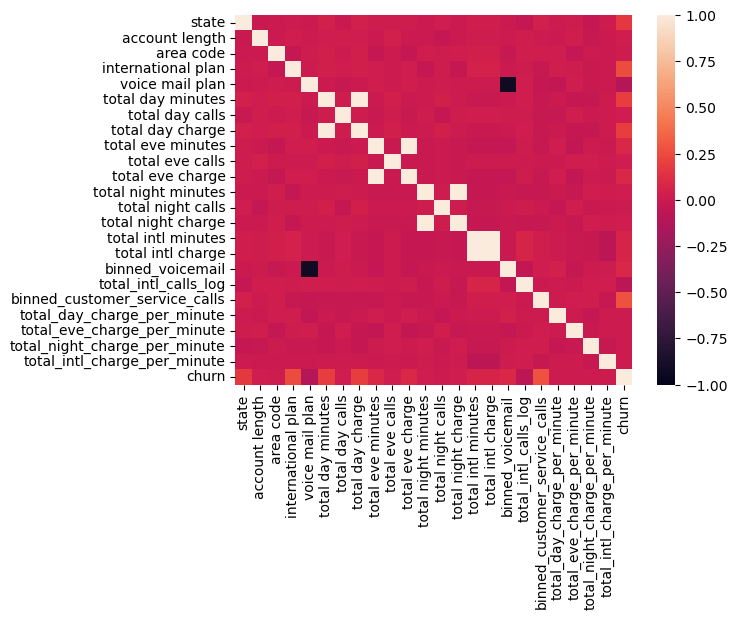

In [471]:
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(method='pearson'),vmax=1,vmin=-1)
plt.show()

#### From the heatmap, we can see that following features are highly correlated:
- total day minutes & total day charge
- total eve minutes & total eve charge
- total night minutes & total night charge
- total intl minutes & total intl charge
- binned_voicemail & voice mail plan

In [473]:
# for deciding which feature to keep and which to remove - we can use feature importance of random forest classifier and also look at variability(high variance -> more important)
rfc=RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [474]:
featur_importance=pd.DataFrame({'importance':rfc.feature_importances_,'features':X_train.columns})
featur_importance.sort_values(by='importance',ascending=False)

importance                       features
5     0.121764              total day minutes
7     0.121142               total day charge
18    0.074425  binned_customer_service_calls
3     0.065469             international plan
10    0.051659               total eve charge
8     0.049184              total eve minutes
17    0.041651           total_intl_calls_log
0     0.039883                          state
14    0.038630             total intl minutes
21    0.037816  total_night_charge_per_minute
15    0.036487              total intl charge
6     0.033417                total day calls
19    0.032498    total_day_charge_per_minute
11    0.032296            total night minutes
20    0.032124    total_eve_charge_per_minute
13    0.031168             total night charge
1     0.030153                 account length
22    0.028635   total_intl_charge_per_minute
12    0.028367              total night calls
9     0.025101                total eve calls
4     0.023864                voice mail plan
16    0.016973               binned_voicemail
2     0.007294                      area code

In [475]:
## variability
X_train.var().sort_values(ascending=False)

total_intl_calls_log             6.164898e-01
total intl charge                6.090785e-01
total intl minutes               6.065848e-01
account length                   5.658598e-01
total day charge                 5.583341e-01
total day minutes                5.577229e-01
total eve minutes                5.549527e-01
total eve charge                 5.536680e-01
total day calls                  5.493989e-01
total eve calls                  5.487704e-01
total night charge               5.432825e-01
total night minutes              5.429065e-01
total night calls                5.261214e-01
voice mail plan                  1.992554e-01
international plan               8.653266e-02
area code                        1.584247e-02
binned_customer_service_calls    9.359424e-03
state                            3.501826e-03
binned_voicemail                 1.065539e-03
total_intl_charge_per_minute     1.076756e-07
total_day_charge_per_minute      8.461337e-10
total_night_charge_per_minute    2

In [476]:
columns_to_drop = ['total intl minutes', 'total day minutes', 'total eve minutes',
                   'total night minutes', 'binned_voicemail', 'total_intl_charge_per_minute',
                   'total_day_charge_per_minute', 'total_night_charge_per_minute',
                   'total_eve_charge_per_minute']

X_train.drop(columns=columns_to_drop, inplace=True)
X_test.drop(columns=columns_to_drop, inplace=True)
X_train.head()

state  account length  area code  international plan  \
3286  0.152542        0.094340   0.501125                   0   
86    0.160714       -0.132075   0.253563                   0   
1349  0.122449       -0.566038   0.245311                   0   
1649  0.127660        0.547170   0.253563                   0   
3000  0.264151       -0.264151   0.245311                   0   

      voice mail plan  total day calls  total day charge  total eve calls  \
3286                1         0.148148          0.561262         0.333333   
86                  0         0.148148         -0.294379         0.037037   
1349                1         0.222222         -0.520825         0.185185   
1649                0        -0.555556         -1.524464         0.370370   
3000                0         0.296296          0.603316        -0.518519   

      total eve charge  total night calls  total night charge  \
3286          0.311227          -0.148148           -0.626230   
86           -0.678804          -0.592593           -0.167213   
1349         -0.560902          -0.037037            0.281967   
1649         -0.115301           1.444444           -0.432787   
3000         -1.084525          -0.629630            1.304918   

      total intl charge  total_intl_calls_log  binned_customer_service_calls  
3286           0.783505              1.050340                       0.110636  
86            -0.639175              0.325798                       0.210417  
1349          -1.309278             -0.398744                       0.110636  
1649           0.030928              0.000000                       0.110636  
3000           1.175258              0.000000                       0.210417

## balance the data

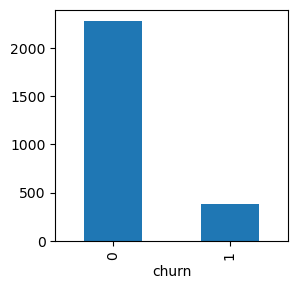

In [478]:
plt.figure(figsize=(3,3))
y_train.value_counts().plot(kind='bar')
plt.show()

In [479]:
ada=ADASYN(sampling_strategy='minority',random_state=42)

In [480]:
X_resample,y_resample=ada.fit_resample(X_train,y_train)

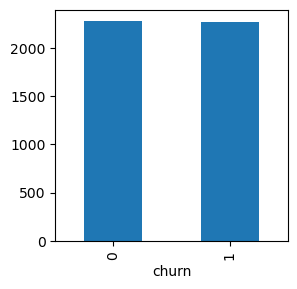

In [481]:
plt.figure(figsize=(3,3))
y_resample.value_counts().plot(kind='bar')
plt.show()

In [482]:
X_train.shape,y_train.shape,X_resample.shape,y_resample.shape

((2666, 14), (2666,), (4552, 14), (4552,))

## Model Training & Evaluation

In [484]:
models ={
'logistic_regression':LogisticRegression(),
'random_forest':RandomForestClassifier(),
'xgboost':XGBClassifier()
}

In [485]:
kf=StratifiedKFold(random_state=42)

In [486]:
cv_metrics = {'model': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

In [487]:
## performing cross validation on training data set 
for model_name,model in models.items():
    cv_accuracy=cross_val_score(estimator=model,scoring='accuracy',cv=kf,X=X_resample,y=y_resample).mean()
    cv_precision=cross_val_score(estimator=model,scoring='precision',cv=kf,X=X_resample,y=y_resample).mean()
    cv_recall=cross_val_score(estimator=model,scoring='recall',cv=kf,X=X_resample,y=y_resample).mean()
    cv_f1=cross_val_score(estimator=model,scoring='f1',cv=kf,X=X_resample,y=y_resample).mean()
    cv_roc_auc=cross_val_score(estimator=model,scoring='roc_auc',cv=kf,X=X_resample,y=y_resample).mean()
    cv_metrics['model'].append(model_name)
    cv_metrics['accuracy'].append(cv_accuracy)
    cv_metrics['precision'].append(cv_precision)
    cv_metrics['recall'].append(cv_recall)
    cv_metrics['f1'].append(cv_f1)
    cv_metrics['roc_auc'].append(cv_roc_auc)

In [488]:
cv_metrics

{'model': ['logistic_regression', 'random_forest', 'xgboost'],
 'accuracy': [0.7695499451152579, 0.9547440923511177, 0.9606767107755033],
 'precision': [0.7795273922984557, 0.9583731160193872, 0.9729091192670763],
 'recall': [0.7504352035629569, 0.949381807619693, 0.9476225976666506],
 'f1': [0.7645827804637099, 0.9551238699641091, 0.9600927791681126],
 'roc_auc': [0.8368589531266324, 0.988087025425305, 0.9878988453003059]}

In [489]:
test_metrics={'model': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

In [490]:
for model_name,model in models.items():
    model.fit(X=X_resample,y=y_resample)
    y_pred_test=model.predict(X_test)
    y_pred_prob=model.predict_proba(X_test)[:,1]
    # evaluation metrics
    accuracy=accuracy_score(y_test,y_pred_test)
    precision=precision_score(y_test,y_pred_test)
    recall=recall_score(y_test,y_pred_test)
    f1=f1_score(y_test,y_pred_test)
    roc_auc=roc_auc_score(y_test,y_pred_prob)
    test_metrics['model'].append(model_name)
    test_metrics['accuracy'].append(accuracy)
    test_metrics['precision'].append(precision)
    test_metrics['recall'].append(recall)
    test_metrics['f1'].append(f1)
    test_metrics['roc_auc'].append(roc_auc)
    

In [491]:
test_metrics

{'model': ['logistic_regression', 'random_forest', 'xgboost'],
 'accuracy': [0.7526236881559221, 0.8920539730134932, 0.9250374812593704],
 'precision': [0.3411214953271028, 0.6506024096385542, 0.7701149425287356],
 'recall': [0.7525773195876289, 0.5567010309278351, 0.6907216494845361],
 'f1': [0.4694533762057878, 0.6, 0.7282608695652174],
 'roc_auc': [0.8238741182854044, 0.860083197684934, 0.8816965093145234]}

In [591]:
compare=pd.concat([pd.DataFrame(cv_metrics),pd.DataFrame(test_metrics)])
compare

model  accuracy  precision    recall        f1   roc_auc
0  logistic_regression  0.769550   0.779527  0.750435  0.764583  0.836859
1        random_forest  0.954744   0.958373  0.949382  0.955124  0.988087
2              xgboost  0.960677   0.972909  0.947623  0.960093  0.987899
0  logistic_regression  0.752624   0.341121  0.752577  0.469453  0.823874
1        random_forest  0.892054   0.650602  0.556701  0.600000  0.860083
2              xgboost  0.925037   0.770115  0.690722  0.728261  0.881697

In [ ]:
## conclusion - we will go with XGBoost algorithm

In [593]:
best_model_name='xgboost'
best_model=models[best_model_name]

In [595]:
y_pred_test=best_model.predict(X_test)

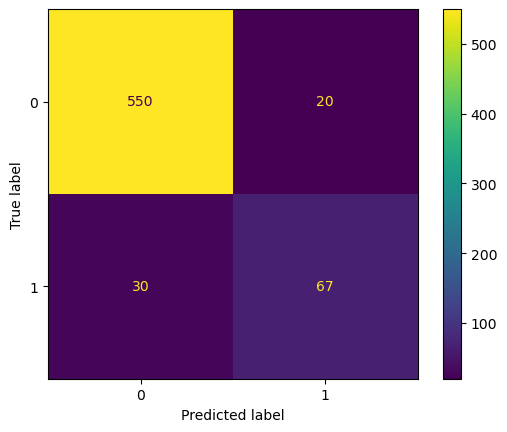

In [609]:
cm=confusion_matrix(y_test,y_pred_test)
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()